공공데이타 - https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("소상공인시장진흥공단_상가(상권)정보_서울_202403.csv", dtype={2: str})

In [3]:
df.shape

(475236, 39)

In [4]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
# 컬럼 정리
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.shape

(475236, 11)

In [6]:
df["시군구명"].unique()

array(['광진구', '중구', '노원구', '양천구', '강서구', '송파구', '구로구', '강남구', '영등포구',
       '금천구', '마포구', '성동구', '중랑구', '서초구', '동작구', '은평구', '동대문구', '서대문구',
       '도봉구', '종로구', '관악구', '성북구', '강동구', '용산구', '강북구'], dtype=object)

In [7]:
df['상호명_소문자'] = df['상호명'].str.lower()

In [8]:
df.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '도로명주소', '경도', '위도', '상호명_소문자'],
      dtype='object')

In [9]:
df_31 = df[df["상호명_소문자"].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()

In [10]:
df_31.shape

(398, 12)

In [11]:
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "배스킨라빈스"
df_31.loc[df_31["상호명_소문자"].str.contains("던킨|dunkin"), "브랜드명"] = "던킨도너츠"

In [12]:
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
1970,비알배스킨라빈스한남HIVE,배스킨라빈스
4826,비알배스킨라빈스동부이촌점,배스킨라빈스
8942,배스킨라빈스상계역점,배스킨라빈스
9497,배스킨라빈스길동역점,배스킨라빈스
9808,비알배스킨라빈스서울대병원,배스킨라빈스


In [13]:
df_31.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '도로명주소', '경도', '위도', '상호명_소문자', '브랜드명'],
      dtype='object')

In [14]:
df_31 = df_31[df_31['상권업종대분류명'] == '음식']

In [15]:
df_31.shape

(395, 13)

In [16]:
brand_count = df_31["브랜드명"].value_counts() # "브랜드명"의 빈도수
brand_count

브랜드명
배스킨라빈스    291
던킨도너츠     104
Name: count, dtype: int64

In [17]:
relative_frequency = df_31["브랜드명"].value_counts(normalize=True)  # normalize=True 빈도수의 비율
relative_frequency

브랜드명
배스킨라빈스    0.736709
던킨도너츠     0.263291
Name: proportion, dtype: float64

In [18]:
plt.rc('font', family='Malgun Gothic') 

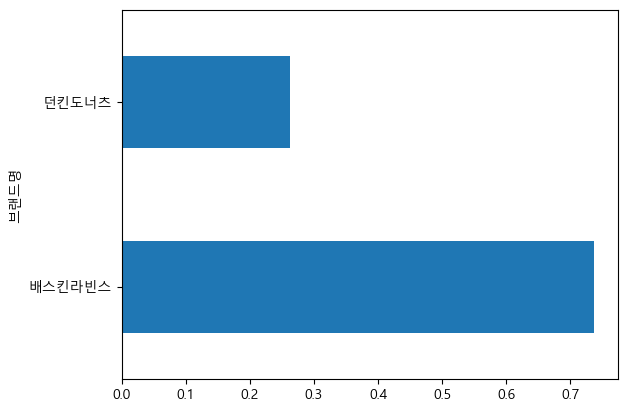

In [19]:
relative_frequency.plot.barh();

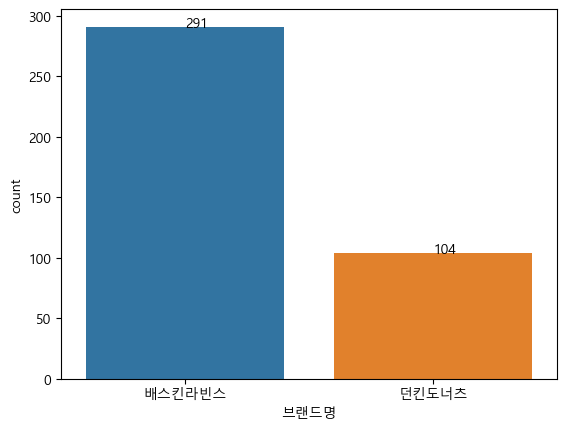

In [20]:
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count):
    g.text(x=i, y=val, s=val)


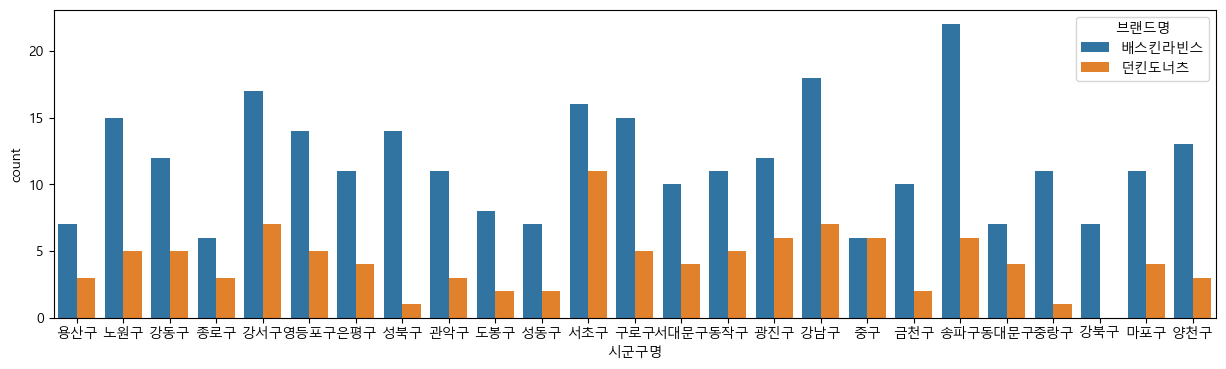

In [21]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

In [22]:
table_city_brand = df_31.pivot_table(index="시군구명", columns="브랜드명", values="상호명", aggfunc="count")
table_city_brand.head()

브랜드명,던킨도너츠,배스킨라빈스
시군구명,,
강남구,7.0,18.0
강동구,5.0,12.0
강북구,NaN,7.0
강서구,7.0,17.0
관악구,3.0,11.0


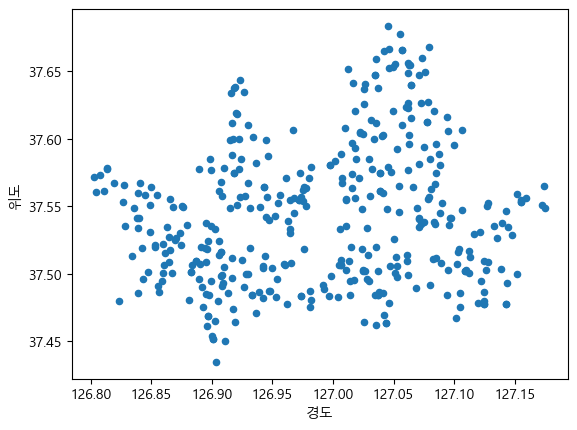

In [23]:
df_31[["위도", "경도"]].plot.scatter(x="경도", y="위도");   # 산점도(scatter plot)

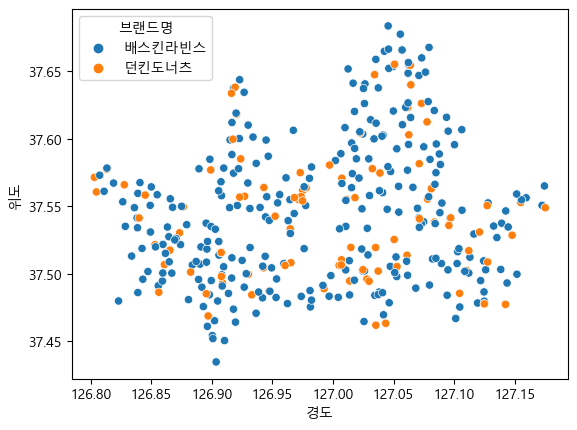

In [24]:
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명");

https://python-visualization.github.io/folium/latest/user_guide/map.html

지도 시각화를 위한 라이브러리   
pip install folium

In [25]:
import folium

In [26]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.544168099384144, 126.9905536972075)

In [27]:
folium.Map(
    location=(lat, long),
    control_scale=True,
)

In [28]:
m = folium.Map([lat, long])

folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)

m

In [29]:
df_31.index

Index([  1970,   4826,   8942,   9497,   9808,  10404,  11947,  14264,  14622,
        15262,
       ...
       454430, 454626, 459262, 461924, 465005, 465455, 468834, 472939, 473619,
       473837],
      dtype='int64', length=395)

In [30]:
m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m

In [31]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(marker_cluster)

m.save('index.html')
m